In [1]:
import cv2 as cv
import numpy as np

## ***Manipulation 1***

***Exercice 1 (Conversion de couleur)***

        1-

In [2]:
peppers = cv.imread('./../images/peppers.png', cv.IMREAD_ANYCOLOR)
peppers is not None

True

In [3]:
peppers = cv.cvtColor(peppers, cv.COLOR_BGR2RGB)

In [4]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x7f2749de1ed0>, (-0.5, 511.5, 383.5, -0.5))

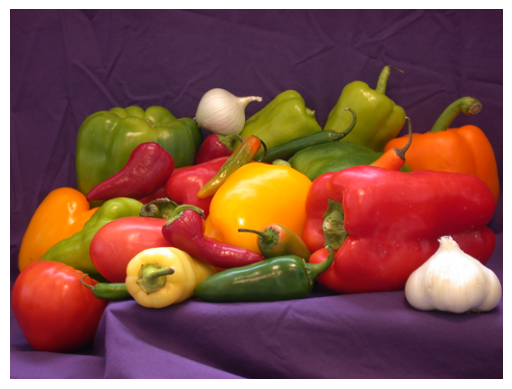

In [5]:
# plt.figure(figsize=(12, 8))
plt.imshow(peppers), plt.axis('off')

        2-

In [6]:
peppers_hsv = cv.cvtColor(peppers, cv.COLOR_RGB2HSV)

        3-

In [7]:
peppers_h = peppers_hsv[:, :, 0] 
peppers_s = peppers_hsv[:, :, 1] 
peppers_v = peppers_hsv[:, :, 2] 

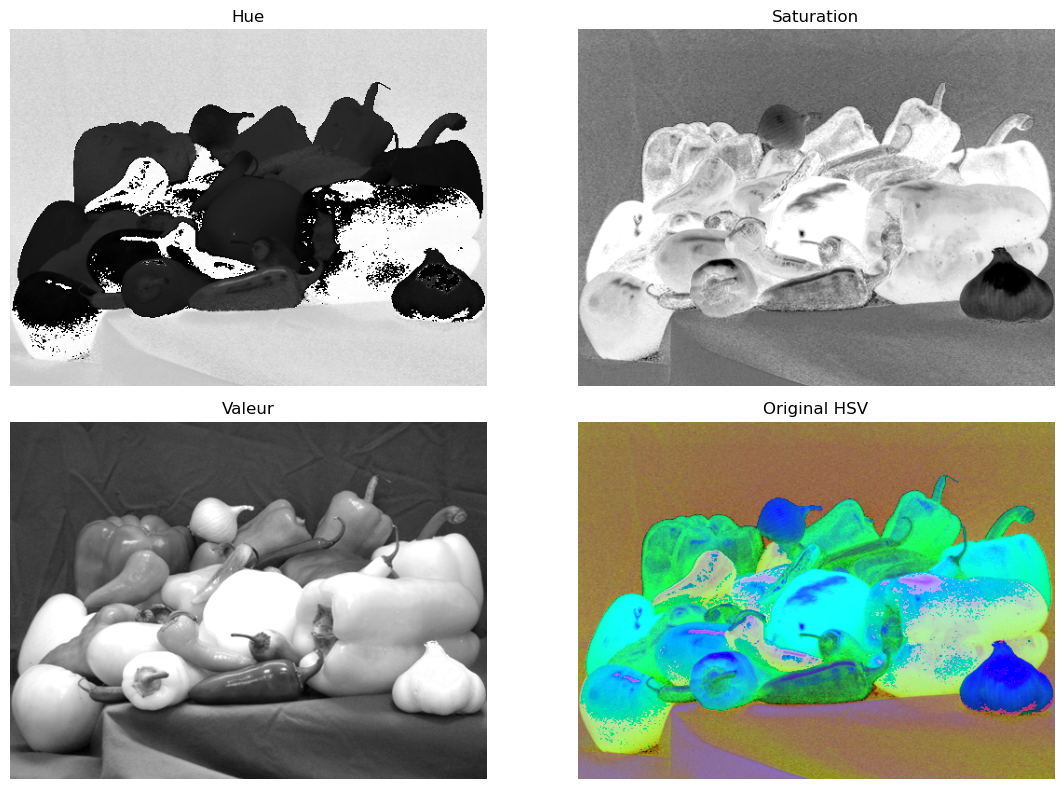

In [8]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(peppers_h, cmap='gray'), plt.title('Hue'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(peppers_s, cmap='gray'), plt.title('Saturation'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(peppers_v, cmap='gray'), plt.title('Valeur'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(peppers_hsv), plt.title('Original HSV'), plt.axis('off')
plt.tight_layout()

        4-

In [9]:
peppers_YCbCr = cv.cvtColor(peppers, cv.COLOR_RGB2YCrCb)

        5-

In [10]:
peppers_Y = peppers_hsv[:, :, 0] 
peppers_Cb = peppers_hsv[:, :, 1] 
peppers_Cr = peppers_hsv[:, :, 2] 

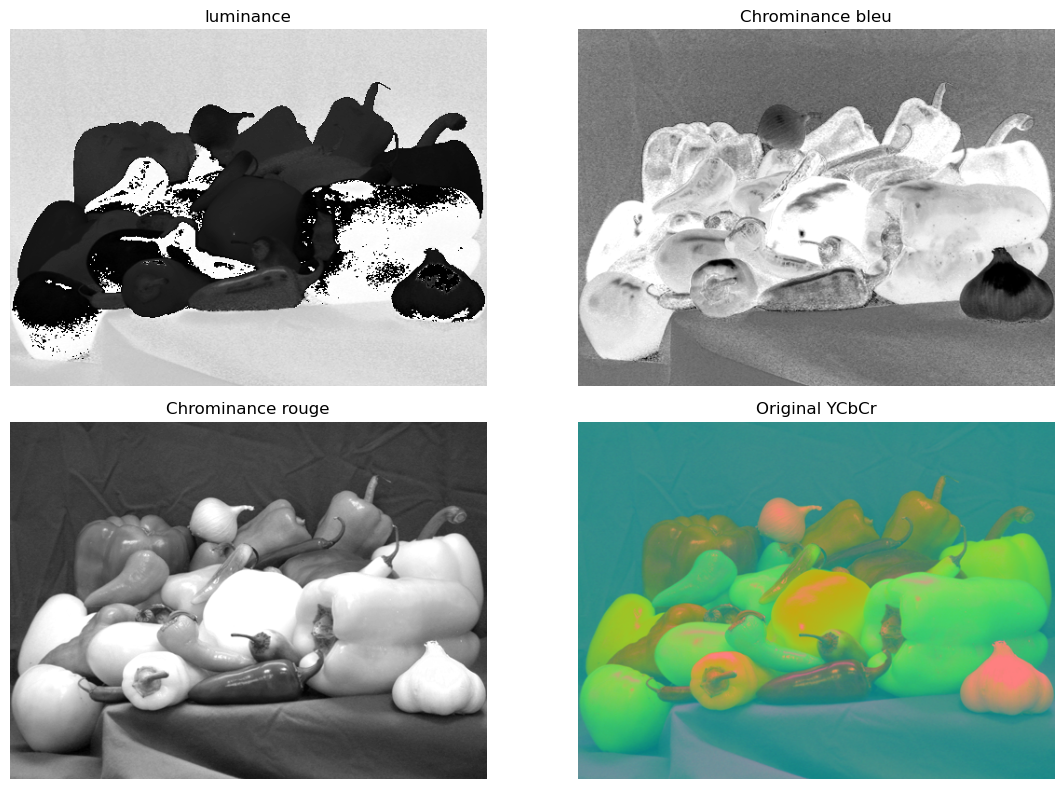

In [11]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1), plt.imshow(peppers_Y, cmap='gray'), plt.title('luminance'), plt.axis('off')
plt.subplot(2, 2, 2), plt.imshow(peppers_Cb, cmap='gray'), plt.title('Chrominance bleu'), plt.axis('off')
plt.subplot(2, 2, 3), plt.imshow(peppers_Cr, cmap='gray'), plt.title('Chrominance rouge'), plt.axis('off')
plt.subplot(2, 2, 4), plt.imshow(peppers_YCbCr), plt.title('Original YCbCr'), plt.axis('off')
plt.tight_layout()

        6-

In [12]:
peppers_RGB = cv.cvtColor(peppers_YCbCr, cv.COLOR_YCrCb2RGB)

In [13]:
diff = np.sum(peppers_RGB-peppers) / np.size(peppers)
diff

43.15229627821181

        7-

(<matplotlib.image.AxesImage at 0x7f27481ef9d0>, (-0.5, 511.5, 383.5, -0.5))

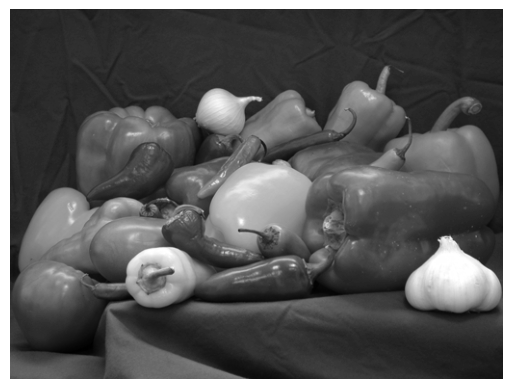

In [14]:
peppers_Gray = cv.cvtColor(peppers, cv.COLOR_RGB2GRAY)
# plt.figure(figsize=(12, 8))
plt.imshow(peppers_Gray, cmap='gray'), plt.axis('off')

***Exercice 2 (Opérations sur l'image)***

        1-

In [15]:
cameraman = cv.imread('../images/cameraman.png', cv.IMREAD_GRAYSCALE)
rice = cv.imread(cv.samples.findFile('../images/rice.png'), cv.IMREAD_GRAYSCALE)

cameraman is not None and rice is not None

True

        2-

In [16]:
X = cv.add(cameraman, rice, dtype=cv.CV_8U)

(<matplotlib.image.AxesImage at 0x7f2748272850>, (-0.5, 255.5, 255.5, -0.5))

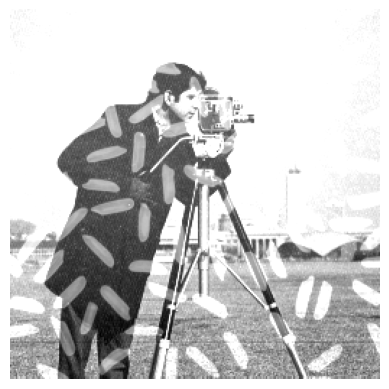

In [17]:
plt.imshow(X, cmap='gray'), plt.axis('off')

        3-

(<matplotlib.image.AxesImage at 0x7f274a087450>, (-0.5, 255.5, 255.5, -0.5))

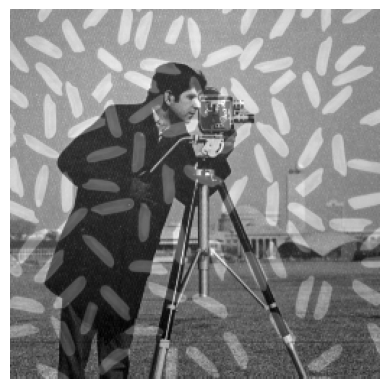

In [18]:
Y = cv.add(cameraman, rice, dtype=cv.CV_16U)
plt.imshow(Y, cmap='gray'), plt.axis('off')

(<Axes: title={'center': "l'image avec 16 bits"}>,
 Text(0.5, 1.0, "l'image avec 16 bits"),
 (-0.5, 255.5, 255.5, -0.5))

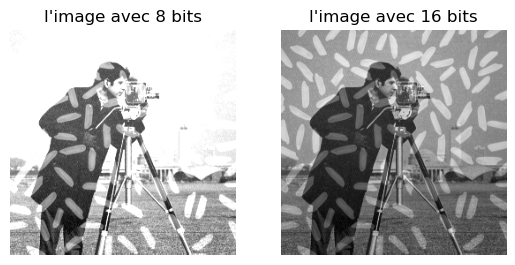

In [19]:
plt.subplot(1, 2, 1), plt.imshow(X, cmap='gray'), plt.title("l'image avec 8 bits"), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(Y, cmap='gray'), plt.title("l'image avec 16 bits"), plt.axis('off')

        4-

(<matplotlib.image.AxesImage at 0x7f274813f9d0>, (-0.5, 255.5, 255.5, -0.5))

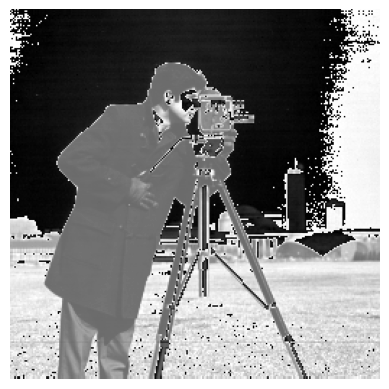

In [20]:
Z = np.add(cameraman, 99, dtype=np.uint8)
plt.imshow(Z, cmap='gray'), plt.axis('off')

        5-

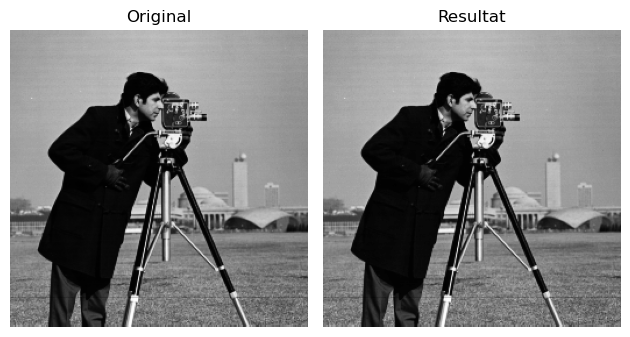

In [21]:
A = np.uint8(cameraman * 0.5)
plt.subplot(1, 2, 1), plt.imshow(cameraman, cmap='gray'), plt.title('Original'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(A, cmap='gray'), plt.title('Resultat'), plt.axis('off')
plt.tight_layout()

        6-

In [22]:
h, w = int(cameraman.shape[0]/2), int(cameraman.shape[1]/2)
cameraman_res = cv.resize(cameraman, dsize=(h, w))
print(f"les dimensions de l'image originals sont {cameraman.shape}")
print(f"les dimensions de l'image resultante sont {cameraman_res.shape}")

les dimensions de l'image originals sont (256, 256)
les dimensions de l'image resultante sont (128, 128)


In [ ]:
cv.imshow("l'image Originale", cameraman)
cv.imshow("l'image resultante", cameraman_res)
cv.waitKey(0)
cv.destroyAllWindows()

127

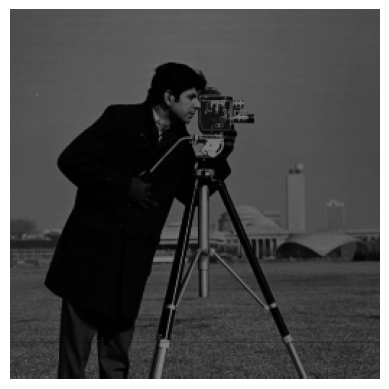

In [24]:
cameraman_q = cv.normalize(cameraman, None, 0, 127, cv.NORM_MINMAX)
plt.imshow(cameraman_q, cmap='gray', vmax=255), plt.axis('off')
cameraman_q.max()

***Exercice 3 (Transformation d'histogramme)***

        1-

In [25]:
coins = cv.imread(cv.samples.findFile('../images/coins.png'), cv.IMREAD_GRAYSCALE)
coins is not None

True

(<matplotlib.image.AxesImage at 0x7f27483879d0>, (-0.5, 299.5, 245.5, -0.5))

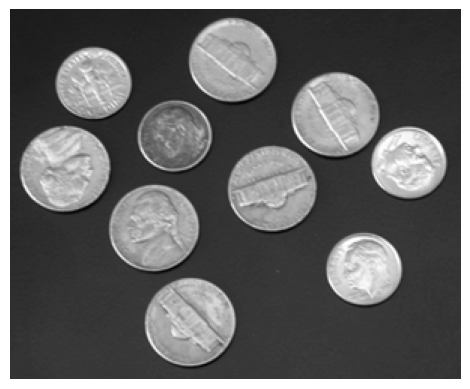

In [26]:
plt.imshow(coins, cmap='gray'), plt.axis('off')

        2-

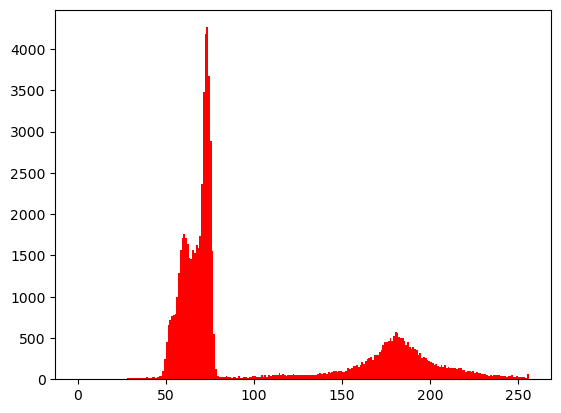

In [27]:
_ = plt.hist(coins.flatten(), 256, (0, 256), color='r')

        3-

In [28]:
i_min, i_max, i_mean = coins.min().astype(np.int64), coins.max().astype(np.int64), coins.mean()
i_min, i_max, i_mean

(23, 255, 102.97910569105692)

        4-

In [29]:
C = (i_max - i_min) / (i_max + i_min)
C

0.8345323741007195

        5-

(<matplotlib.image.AxesImage at 0x7f2739774750>, (-0.5, 299.5, 245.5, -0.5))

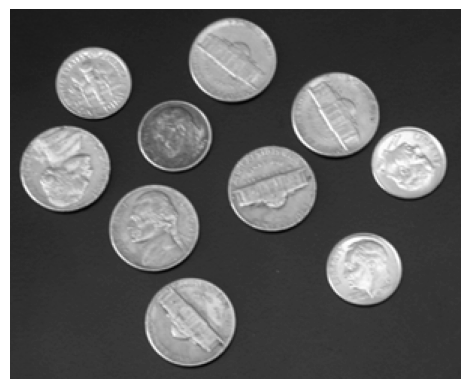

In [39]:
new_coins = np.uint8((coins - i_min) * 255./(i_max - i_min))
plt.imshow(new_coins, cmap='gray'), plt.axis('off')

        6-

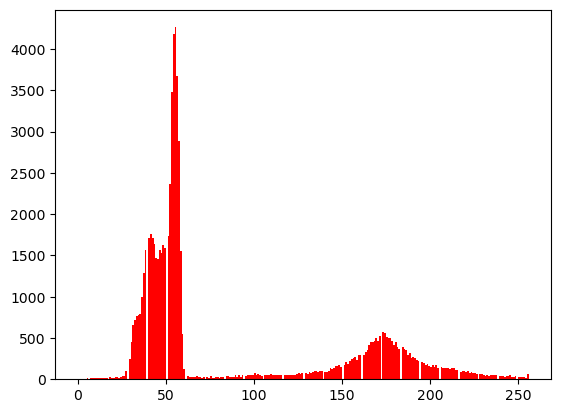

In [40]:
res = cv.normalize(coins, None, 0, 255, cv.NORM_MINMAX)
_ = plt.hist(res.flatten(), 256, (0, 256), color='r')

(<Axes: title={'center': 'image Normalisee'}>,
 (-0.5, 299.5, 245.5, -0.5),
 Text(0.5, 1.0, 'image Normalisee'))

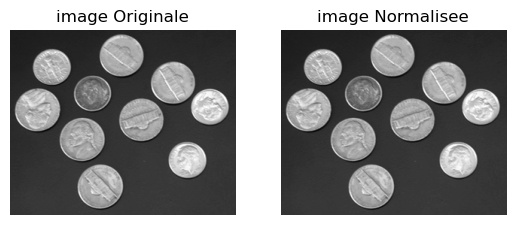

In [41]:
plt.subplot(1, 2, 1), plt.imshow(coins, cmap='gray'), plt.axis('off'), plt.title('image Originale')
plt.subplot(1, 2, 2), plt.imshow(res, cmap='gray'), plt.axis('off'), plt.title('image Normalisee')

        7-

In [32]:
def gamma_transformation(img, gamma=0.5, dst=None):
    max = np.float64(img.max())
    imgf = img.copy().astype(np.float64)
    imgf = np.power(imgf / max, gamma) * max
    if dst is None:
        return imgf.astype(np.uint8)
    dst = imgf

In [33]:
coins0_5 = gamma_transformation(coins, 0.5)
coins1 = gamma_transformation(coins, 1)
coins1_5 = gamma_transformation(coins, 1.5)

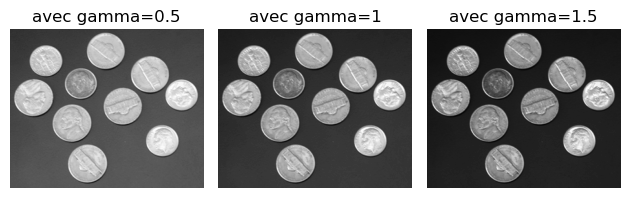

In [34]:
plt.subplot(1, 3, 1), plt.imshow(coins0_5, cmap='gray'), plt.axis('off'), plt.title('avec gamma=0.5')
plt.subplot(1, 3, 2), plt.imshow(coins1, cmap='gray'), plt.axis('off'), plt.title('avec gamma=1')
plt.subplot(1, 3, 3), plt.imshow(coins1_5, cmap='gray'), plt.axis('off'), plt.title('avec gamma=1.5')
plt.tight_layout()

        8-

In [35]:
LUT = np.zeros(256)
LUT[:65] = 2 * np.arange(65)
LUT[65:129] = 128
LUT[129::] = np.arange(129, 256, 1)
LUT

array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
        22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
        44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
        66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
        88.,  90.,  92.,  94.,  96.,  98., 100., 102., 104., 106., 108.,
       110., 112., 114., 116., 118., 120., 122., 124., 126., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 128., 128., 128.,
       128., 128., 128., 128., 128., 128., 128., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

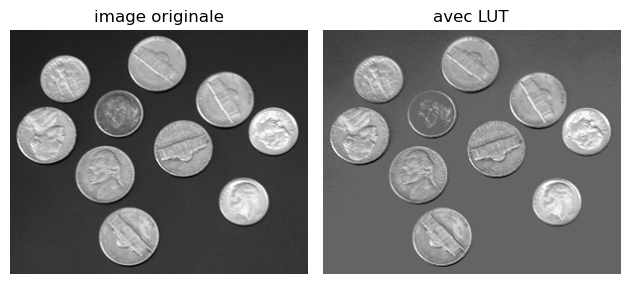

In [36]:
coins_lut = cv.LUT(coins, LUT)
plt.subplot(1, 2, 1), plt.imshow(coins, cmap='gray'), plt.axis('off'), plt.title('image originale')
plt.subplot(1, 2, 2), plt.imshow(coins_lut, cmap='gray'), plt.axis('off'), plt.title('avec LUT')
plt.tight_layout()